In [1]:
#
import pandas as pd
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style()


In [2]:
#generating the table column names
Feature_columnnnames=[]
for i in range(48):
    Feature_columnnnames.append("Feature"+str(i+1))
Feature_columnnnames.append("label")

In [3]:
dataset=pd.read_csv('Sensorless_drive_diagnosis.txt', sep=" ", header=None,names=Feature_columnnnames)

In [4]:
dataset.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,label
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


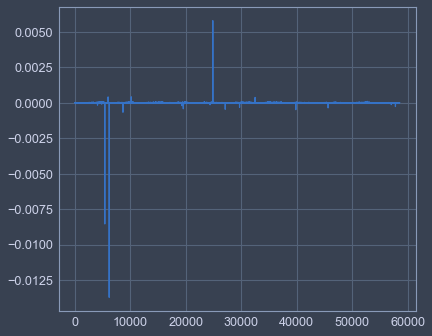

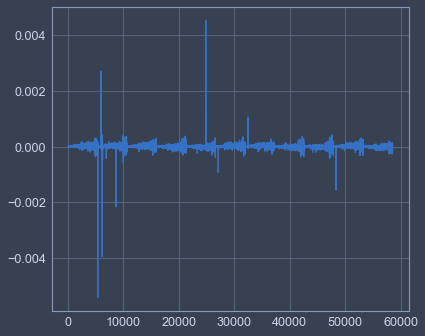

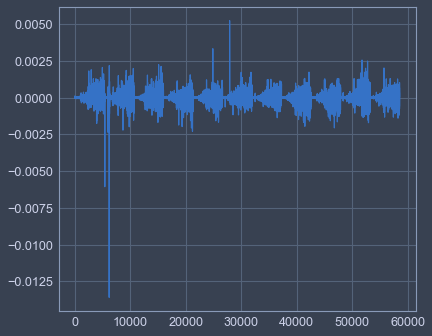

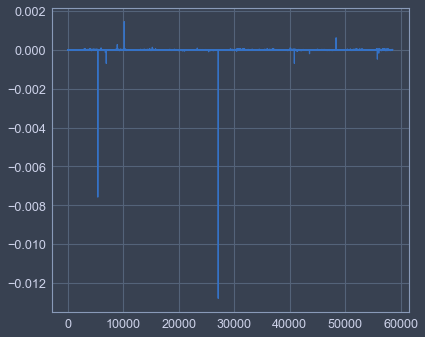

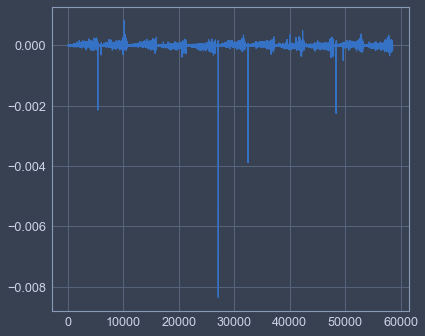

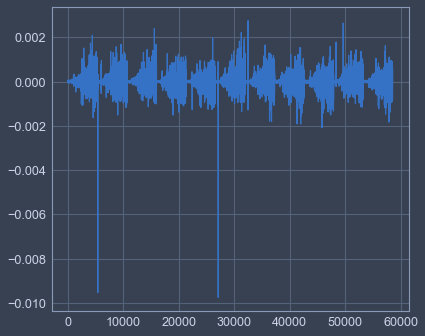

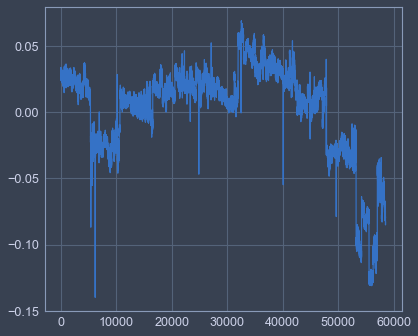

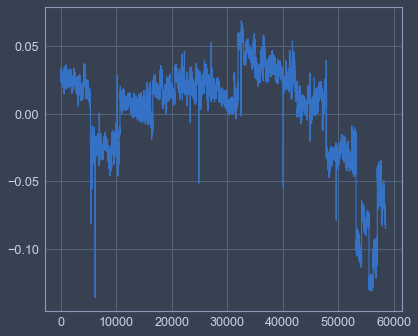

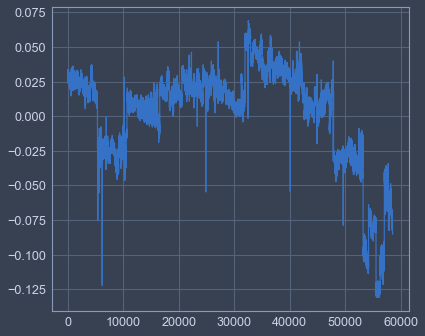

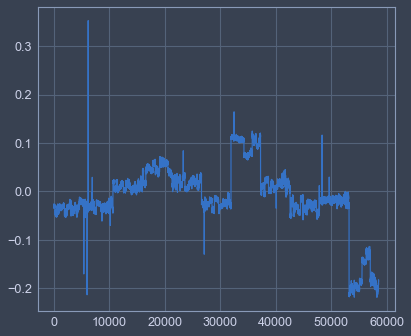

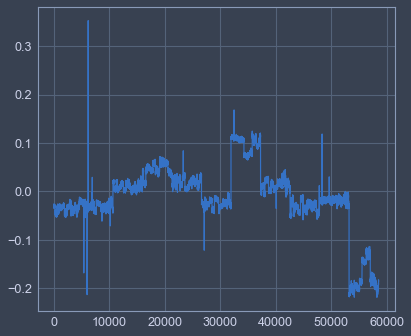

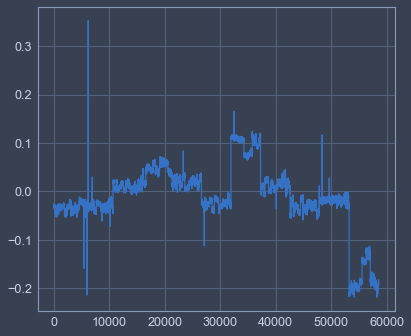

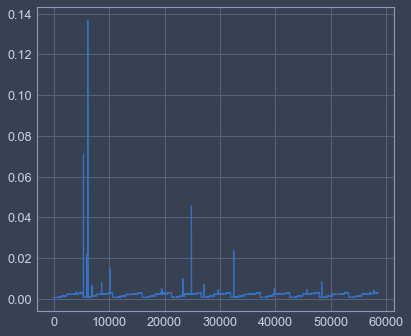

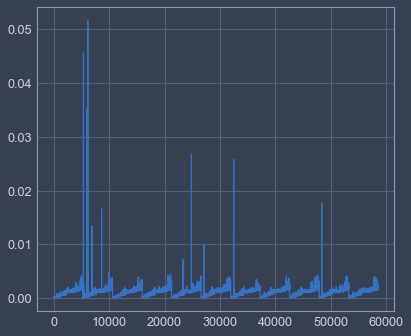

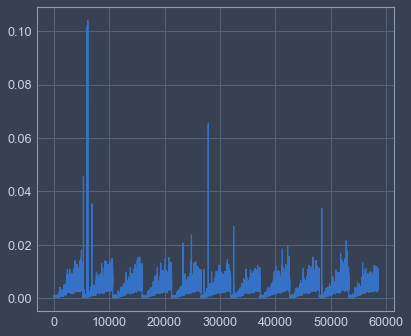

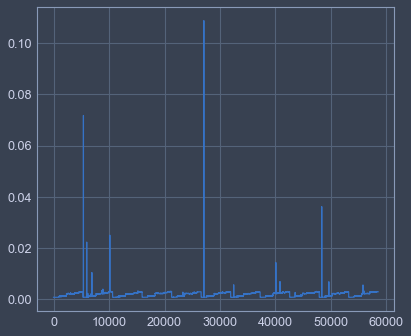

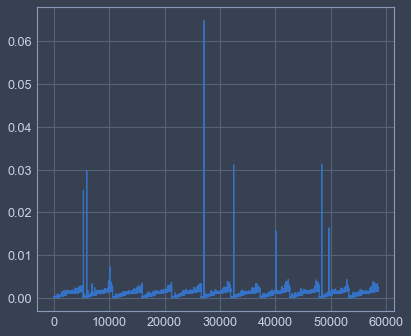

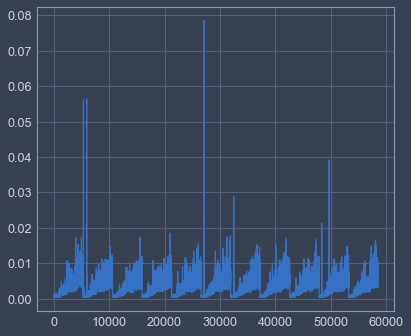

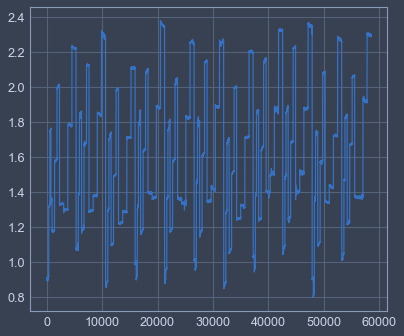

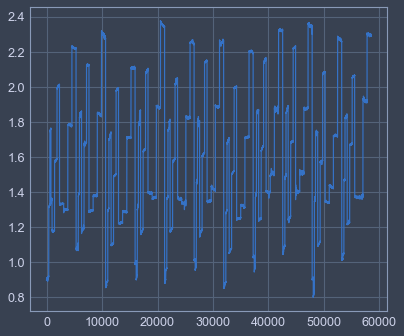

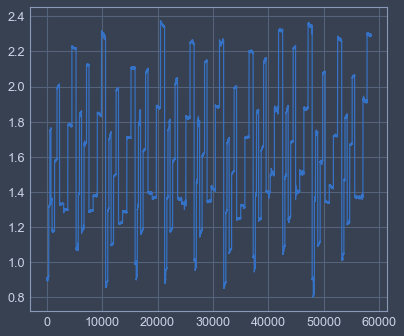

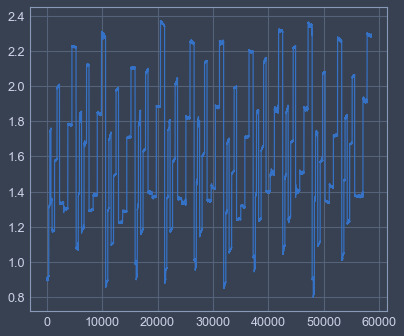

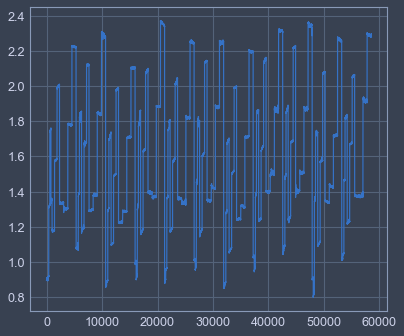

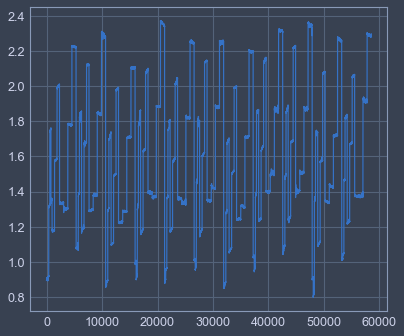

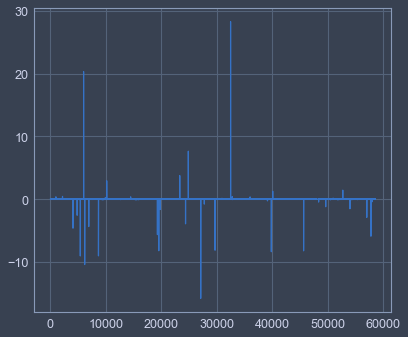

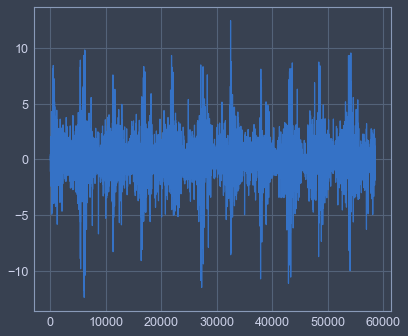

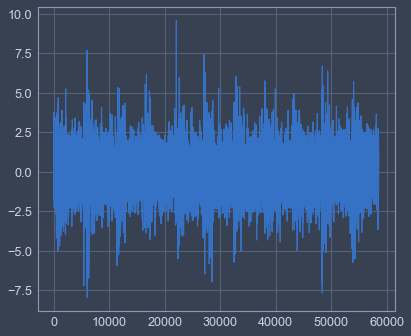

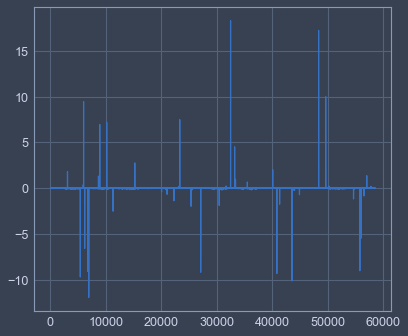

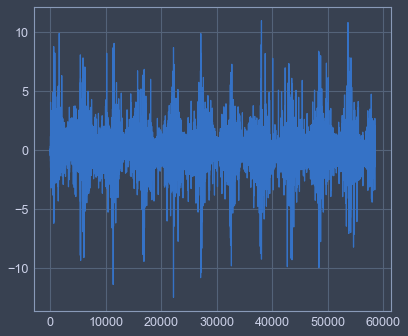

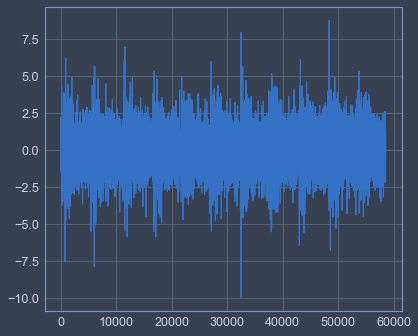

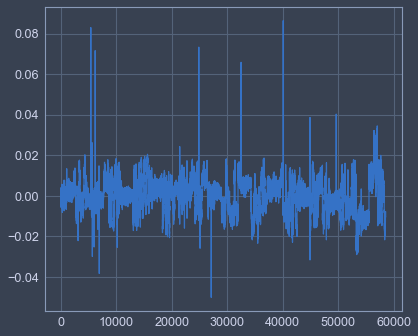

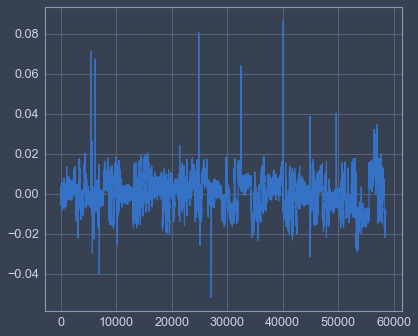

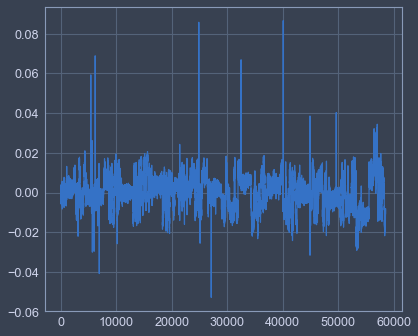

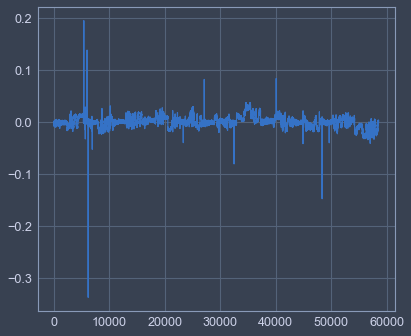

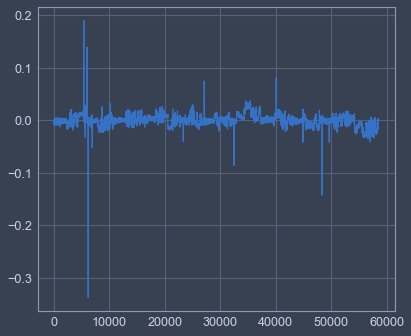

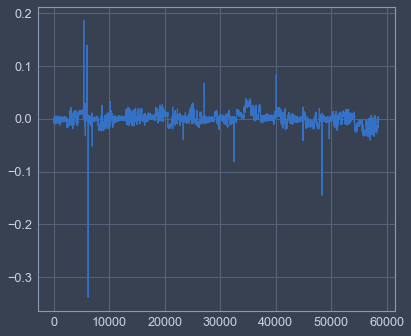

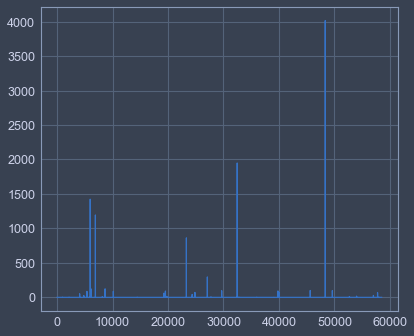

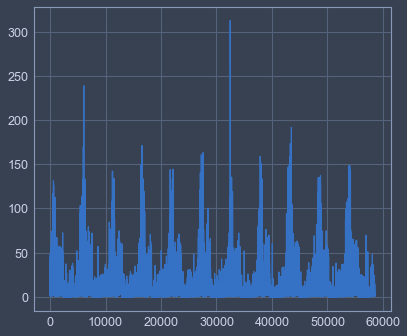

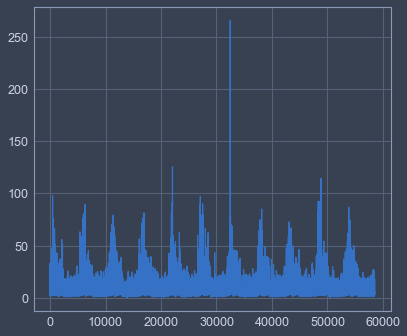

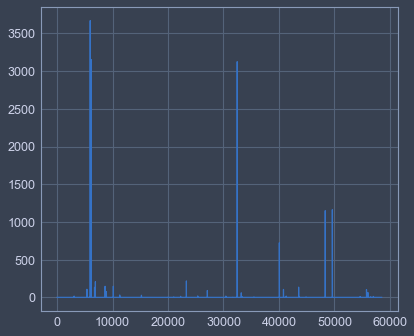

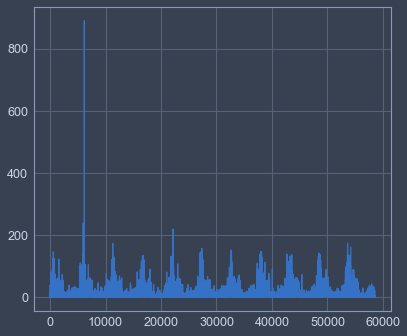

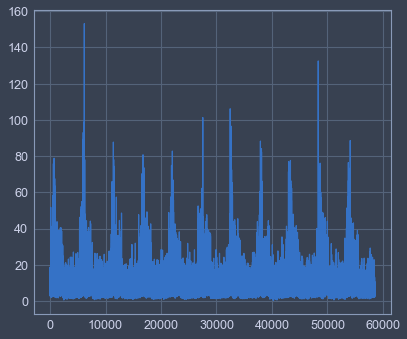

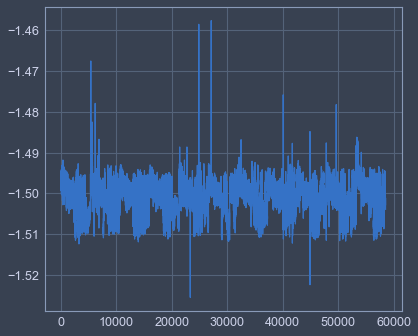

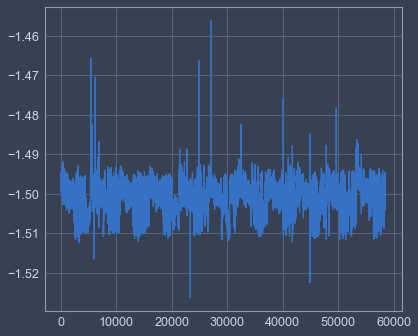

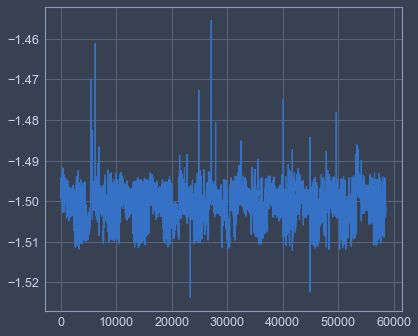

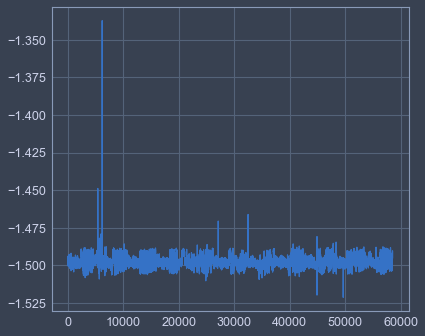

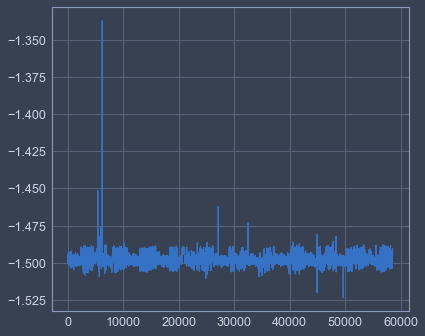

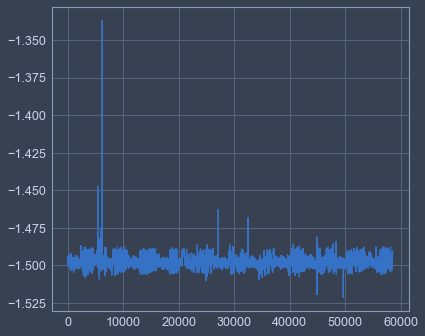

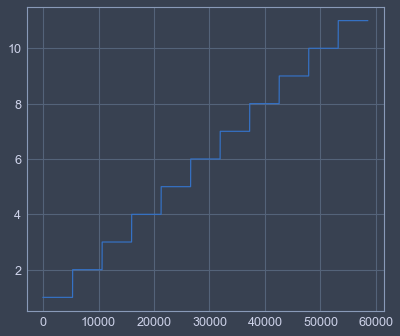

In [5]:
for feature in Feature_columnnnames:
    plt.plot(dataset[feature])
    plt.show()

In [6]:
# no null values
dataset.isnull().values.any()


False

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import label_binarize
y = label_binarize(np.array(dataset["label"]), classes=[1, 2,3,4,5,6,7,8,9,10,11])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,0:48], y, test_size=0.4, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [11]:
X_train.shape

(35105, 48)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
RBF=RandomForestClassifier()

In [14]:
RBF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

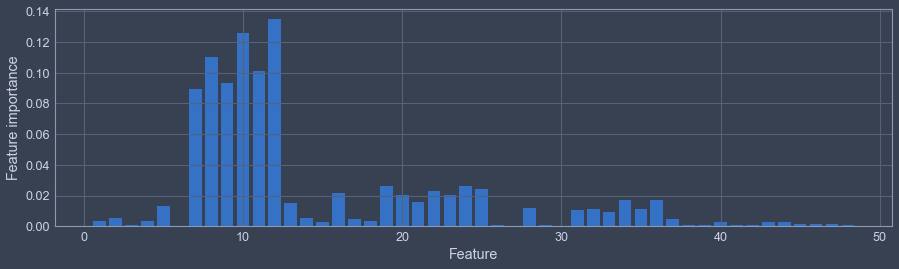

In [15]:
position=[]
for i in range(48):
    position.append(i+1)
plt.figure(figsize=(15,4))
plt.bar(position,RBF.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()

Feature ranking:
1. feature 11 (0.134958)
2. feature 9 (0.125888)
3. feature 7 (0.110064)
4. feature 10 (0.100920)
5. feature 8 (0.093207)
6. feature 6 (0.089642)
7. feature 23 (0.026501)
8. feature 18 (0.026165)
9. feature 24 (0.024249)
10. feature 21 (0.022732)
11. feature 15 (0.021888)
12. feature 22 (0.020424)
13. feature 19 (0.020039)
14. feature 35 (0.016986)
15. feature 33 (0.016890)
16. feature 20 (0.016033)
17. feature 12 (0.014977)
18. feature 4 (0.013139)
19. feature 27 (0.011640)
20. feature 31 (0.011156)
21. feature 34 (0.010974)
22. feature 30 (0.010532)
23. feature 32 (0.008990)
24. feature 1 (0.005413)
25. feature 13 (0.005156)
26. feature 36 (0.004965)
27. feature 16 (0.004508)
28. feature 17 (0.003611)
29. feature 0 (0.003361)
30. feature 3 (0.003284)
31. feature 39 (0.002979)
32. feature 42 (0.002817)
33. feature 14 (0.002618)
34. feature 43 (0.002573)
35. feature 46 (0.001495)
36. feature 44 (0.001444)
37. feature 45 (0.001436)
38. feature 47 (0.001062)
39. feature 

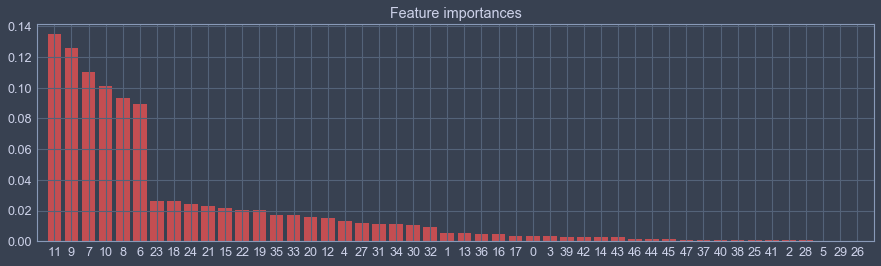

In [16]:
import numpy as np
importances=RBF.feature_importances_
#std = np.std([importances for tree in forest.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(15,4))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [17]:
y_pred=RBF.predict(X_test)


In [18]:
y_pred

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_pred)

0.99414629977781577

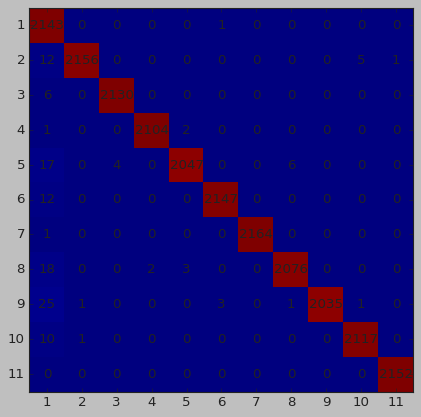

In [21]:
def un_onehot_encode(array):
    output_array=np.zeros(array.shape[0])
    for x in range(array.shape[0]):
        output_array[x]=np.argmax(array[x])   
    return output_array
from sklearn.metrics import confusion_matrix
# draw confusion matrix
plt.style.use('classic')
C = confusion_matrix(un_onehot_encode(y_test), un_onehot_encode(y_pred))
conf_arr = C
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width = len(conf_arr)
height = len(conf_arr[0])

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# cb = fig.colorbar(res)
# alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
alphabet=['1','2','3','4','5','6','7','8','9','10','11']
xlabels=['1','2','3','4','5','6','7','8','9','10','11']
plt.xticks(range(width), xlabels[:width])
plt.yticks(range(height), alphabet[:height])
# plt.savefig('confusion_matrix.png', format='png',dpi=800)
plt.savefig('test.eps', format='eps')
plt.style.use('ggplot')
plt.show()

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


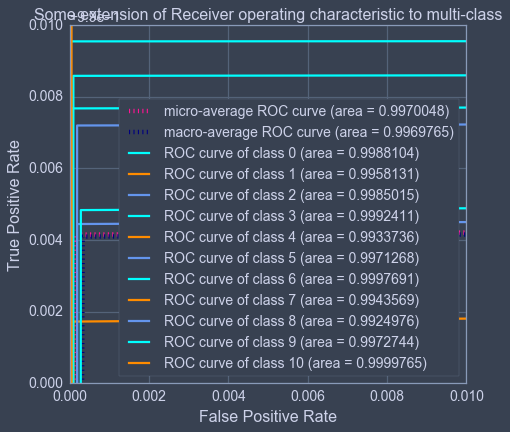

In [23]:
jtplot.style()
# Compute macro-average ROC curve and ROC area
lw=2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.7f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.7f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.7f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

xmin=0.00
ymax=1.00
ymin=0.99
xmax=0.01
plt.axis([xmin,xmax,ymin,ymax])
plt.show()

In [24]:
def micro_average_precision_fn(y_test,y_score,num_classes=n_classes,filename=""):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
   # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

   # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score,average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    
    return precision, recall,average_precision

In [25]:
def micro_average_ap_curve_fn(precision,recall,average_precision,filename=""):
    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))

In [26]:
def multiclass_precision_recall_curve(precision,recall,average_precision,num_classes,filename=""):
    from itertools import cycle
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
    Unq_type=[1, 2,3,4,5,6,7,8,9,10,11]
    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
    print(average_precision["micro"])
    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.4f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(num_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.4f})'
                      ''.format(Unq_type[i], average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.99, 1.0])
    plt.ylim([0.95, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=10))
    plt.show()

In [27]:
precision,recall,average_precision=micro_average_precision_fn(y_test,y_pred,n_classes)

Average precision score, micro-averaged over all classes: 0.99


0.993313044601


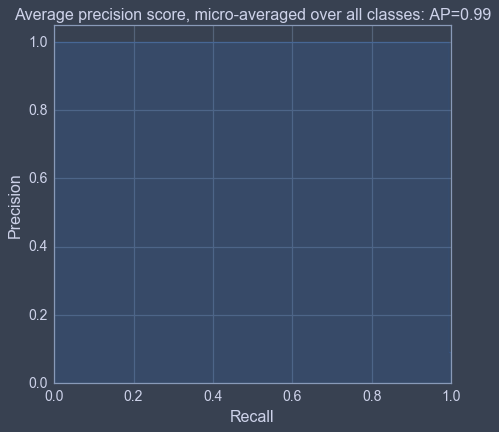

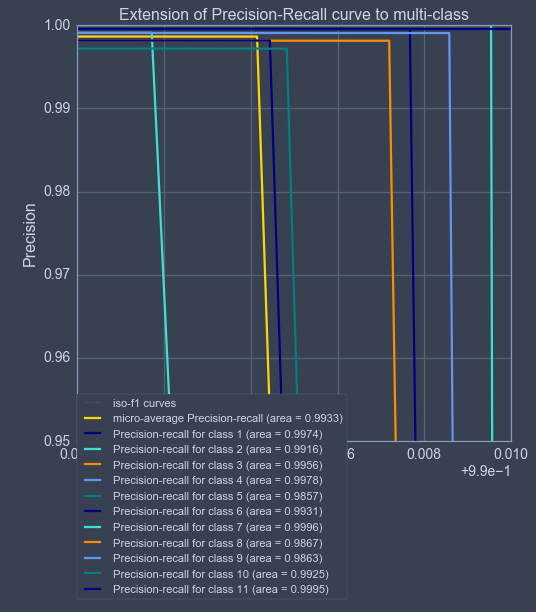

In [28]:
micro_average_ap_curve_fn(precision,recall,average_precision)
multiclass_precision_recall_curve(precision,recall,average_precision,n_classes)